In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [217]:
# 1. 데이터 로드 및 전처리
# 신용카드 데이터셋을 불러옵니다. 

df = pd.read_csv('./DSA_features.csv')
df.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1


In [218]:
df.dtypes

T_xacc_mean     float64
T_xacc_max      float64
T_xacc_min      float64
T_xacc_var      float64
T_xacc_std      float64
                 ...   
LL_zmag_var     float64
LL_zmag_std     float64
LL_zmag_skew    float64
activity         object
people           object
Length: 272, dtype: object

In [219]:
df['people'].value_counts()

people
p1    1140
p2    1140
p3    1140
p4    1140
p5    1140
p6    1140
p7    1140
p8    1140
Name: count, dtype: int64

In [220]:
data = pd.get_dummies(df, columns=['people'], drop_first=True)
data.dtypes

T_xacc_mean    float64
T_xacc_max     float64
T_xacc_min     float64
T_xacc_var     float64
T_xacc_std     float64
                ...   
people_p4         bool
people_p5         bool
people_p6         bool
people_p7         bool
people_p8         bool
Length: 278, dtype: object

In [221]:
## 원핫 인코딩한 부분은 activity까지 변경후 한번에 데이터 타입 통일

In [222]:
data['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [223]:
LABELS = ["Normal", "Fraud"]

activity_mapping = {
    "lyingRigh": 0,
    "lyingBack": 0,
    "jumping": 1,
}
# activity 열을 해당 그룹으로 변환
data['activity_group'] = data['activity'].map(activity_mapping)
data = data.drop(['activity'], axis=1)
data.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_zmag_std,LL_zmag_skew,people_p2,people_p3,people_p4,people_p5,people_p6,people_p7,people_p8,activity_group
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000823,0.036729,False,False,False,False,False,False,False,NaN
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000839,0.347471,False,False,False,False,False,False,False,NaN
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000792,0.045579,False,False,False,False,False,False,False,NaN
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000895,0.240690,False,False,False,False,False,False,False,NaN
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000828,0.258429,False,False,False,False,False,False,False,NaN


In [224]:
# 결측치 홗인
data['activity_group'].isnull().values.any()

True

In [225]:
data=data.dropna()

In [226]:
# 결측치 홗인
data['activity_group'].isnull().values.any()

False

In [227]:
## 데이터타입 float 통일
data =data.astype('float32')
data.dtypes

T_xacc_mean       float32
T_xacc_max        float32
T_xacc_min        float32
T_xacc_var        float32
T_xacc_std        float32
                   ...   
people_p5         float32
people_p6         float32
people_p7         float32
people_p8         float32
activity_group    float32
Length: 278, dtype: object

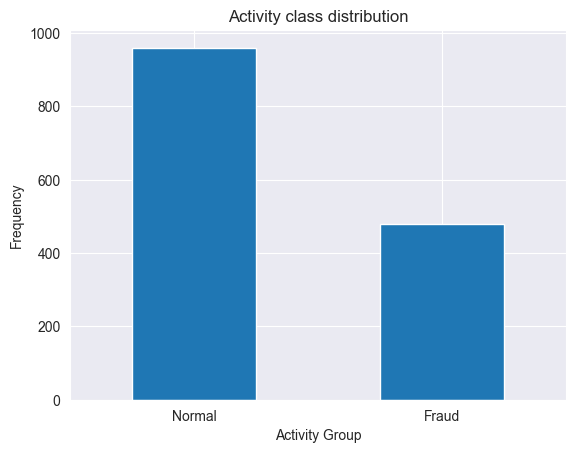

In [228]:
count_classes = data['activity_group'].value_counts(sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Activity class distribution")
plt.xticks(range(2), LABELS)  # LABELS의 키값으로 레이블 설정
plt.xlabel("Activity Group")
plt.ylabel("Frequency")
plt.show()

In [229]:
frauds = data[data.activity_group == 1]
normal = data[data.activity_group == 0]
frauds.shape

(480, 278)

In [230]:
normal.shape

(960, 278)

### 모델을 오직 정상 거래기록으로만 훈련
### 정상 거래기록을 테스트셋에 넣으면 모델의 성능을 평가

In [231]:
RANDOM_SEED = 42

In [232]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.activity_group == 0]
X_train = X_train.drop(['activity_group'], axis=1)

y_test = X_test['activity_group']
X_test = X_test.drop(['activity_group'], axis=1)

print(X_train.dtypes)

X_train = X_train.values
X_test = X_test.values
# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임
print(X_train.shape)
print(X_test.shape)

T_xacc_mean    float32
T_xacc_max     float32
T_xacc_min     float32
T_xacc_var     float32
T_xacc_std     float32
                ...   
people_p4      float32
people_p5      float32
people_p6      float32
people_p7      float32
people_p8      float32
Length: 277, dtype: object
(765, 277)
(288, 277)


In [233]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [234]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
3/3 [==============================] - 0s 46ms/step - loss: 5.6115 - val_loss: 5.5539
Epoch 2/50
3/3 [==============================] - 0s 12ms/step - loss: 5.5984 - val_loss: 5.5400
Epoch 3/50
3/3 [==============================] - 0s 12ms/step - loss: 5.5838 - val_loss: 5.5227
Epoch 4/50
3/3 [==============================] - 0s 14ms/step - loss: 5.5653 - val_loss: 5.5011
Epoch 5/50
3/3 [==============================] - 0s 13ms/step - loss: 5.5423 - val_loss: 5.4754
Epoch 6/50
3/3 [==============================] - 0s 13ms/step - loss: 5.5156 - val_loss: 5.4463
Epoch 7/50
3/3 [==============================] - 0s 14ms/step - loss: 5.4854 - val_loss: 5.4141
Epoch 8/50
3/3 [==============================] - 0s 14ms/step - loss: 5.4519 - val_loss: 5.3791
Epoch 9/50
3/3 [==============================] - 0s 18ms/step - loss: 5.4156 - val_loss: 5.3417
Epoch 10/50
3/3 [==============================] - 0s 19ms/step - loss: 5.3771 - val_loss: 5.3026
Epoch 11/50
3/3 [============

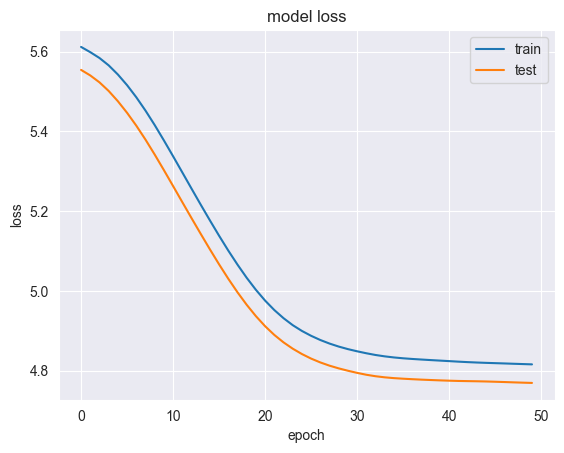

In [235]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [236]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

9/9 [==============================] - 0s 603us/step


,reconstruction_error,true_class
count,288.000000,288.000000
mean,163.221466,0.322917
std,317.307892,0.468405
min,4.404996,0.000000
25%,4.609555,0.000000
50%,4.928514,0.000000
75%,122.973637,1.000000
max,1690.853760,1.000000


In [237]:
error_df.head()

,reconstruction_error,true_class
1128,5.000747,0.0
1565,4.820728,0.0
1508,5.023908,0.0
1025,5.333157,0.0
1588,4.821990,0.0


In [238]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 15

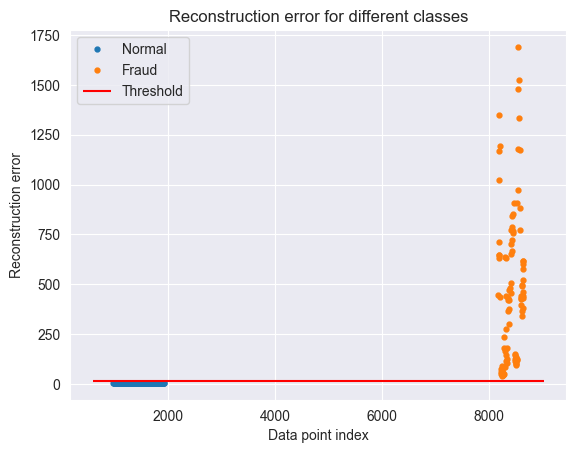

In [239]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

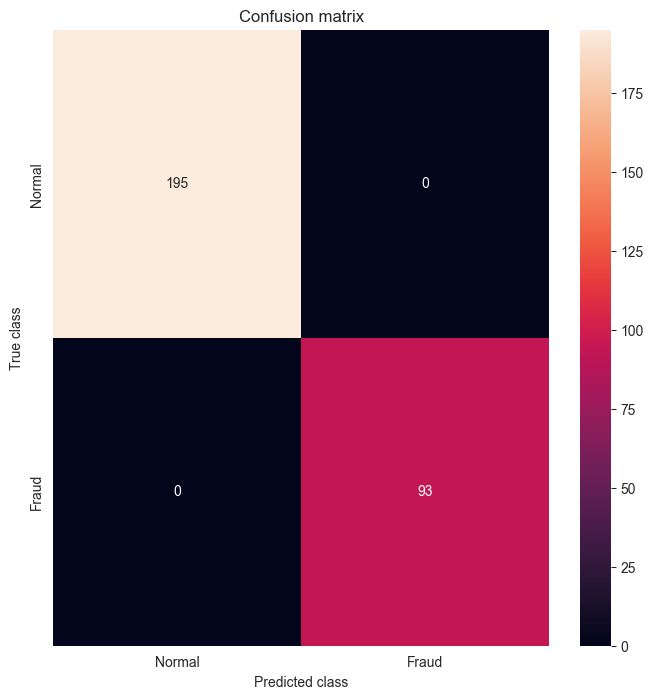

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00        93

    accuracy                           1.00       288
   macro avg       1.00      1.00      1.00       288
weighted avg       1.00      1.00      1.00       288


In [240]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))